In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy import units as u
from astropy.coordinates import SkyCoord

%matplotlib inline

In [2]:
columns = ['RAdeg', 'DEdeg' ,'Rp', 'Per', 'S', 'K', 'Rstar', 'Teff', 
           'Vmag', 'Imag', 'Jmag', 'Ksmag', 'DM', 'Dil', 'logsigV', 
           'SNR','Mult']  
tess_catalog = pd.read_table('../data/apj516470t6_mrt.txt', skiprows=32, delim_whitespace=True, 
                              names=columns)

In [3]:
c = SkyCoord(ra=tess_catalog.RAdeg*u.degree, dec=tess_catalog.DEdeg*u.degree, frame='icrs')
ecoords = c.transform_to('barycentrictrueecliptic')

tess_catalog['elon'] = ecoords.lon.degree
tess_catalog['elat'] = ecoords.lat.degree

In [4]:
tess_catalog['obslen'] = 0.0

tess_catalog['obslen'] = np.where(np.abs(tess_catalog.elat) >= 77.,351,tess_catalog['obslen'])
tess_catalog['obslen'] = np.where((np.abs(tess_catalog.elat) < 77.) & 
                                  (np.abs(tess_catalog.elat) >= 45.),54,tess_catalog['obslen'])
tess_catalog['obslen'] = np.where((np.abs(tess_catalog.elat) < 45.) & 
                                  (np.abs(tess_catalog.elat) > 6.),27,tess_catalog['obslen'])


In [5]:
tess_catalog['ntransits'] = np.around(tess_catalog.obslen / tess_catalog.Per)

In [6]:
print('{} total\n{} 4+ transits\n{} 3 transits\n{} 2 transits\n{} 2 or fewer transits'.format(
        tess_catalog.shape[0],
        np.nonzero(tess_catalog.ntransits >= 4.)[0].shape[0],
        np.nonzero(tess_catalog.ntransits == 3.)[0].shape[0],
        np.nonzero(tess_catalog.ntransits == 2.)[0].shape[0],
        np.nonzero((tess_catalog.ntransits <= 2.) & tess_catalog.ntransits >= 1.)[0].shape[0],
        ))

tess_catalog['bendek_targets'] = ((tess_catalog.ntransits <= 2.) & tess_catalog.ntransits >= 1.)

1984 total
1551 4+ transits
172 3 transits
189 2 transits
260 2 or fewer transits


In [7]:
bendek_catalog = tess_catalog[tess_catalog.bendek_targets]

In [21]:
bendek_catalog['adjSNR'] = bendek_catalog.SNR / (np.sqrt(2) * np.sqrt(1.3))
bendek_catalog['isdetected'] = np.where(bendek_catalog.adjSNR > 8.0, True, False)

/Users/tom/.virtualenvs/p2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/tom/.virtualenvs/p2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [28]:
bendek_catalog_SNR = bendek_catalog[bendek_catalog.adjSNR > 8.0]

In [75]:
# bendek_catalog_SNR[['Rp', 'Per', 'S', 'K', 'Rstar', 'Teff', 
#            'Vmag', 'Imag', 'adjSNR']]

np.sort(bendek_catalog_SNR.Rp)[29]

2.5610000000000004

(0, 60)

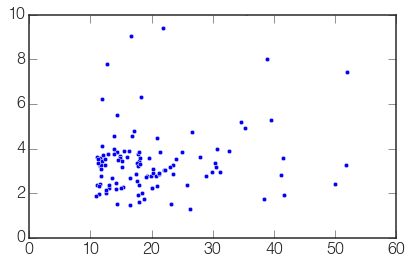

In [35]:
plt.scatter(bendek_catalog_SNR.Per, bendek_catalog_SNR.Rp)
plt.ylim(0,10)
plt.xlim(0,60)

In [76]:
tdepth = ((bendek_catalog_SNR.Rp / bendek_catalog_SNR.Rstar) * 0.009154)**2

In [80]:
tdepth[tdepth < 0.003].shape

(58,)

In [82]:
bendek_catalog_SNR[bendek_catalog_SNR.S < 1.5]

,RAdeg,DEdeg,Rp,Per,S,K,Rstar,Teff,Vmag,Imag,...,logsigV,SNR,Mult,elon,elat,obslen,ntransits,bendek_targets,adjSNR,isdetected
22,8.919,67.420,2.936,29.94,1.2860,2.607,0.4166,3611.0,13.33,11.300,...,-3.695,18.14,1,48.039192,55.432692,54.0,2.0,True,11.249950,True
47,14.810,-14.490,1.993,12.55,0.6411,5.395,0.1574,3027.0,14.98,12.760,...,-3.525,19.72,1,7.754358,-19.148104,27.0,2.0,True,12.229825,True
215,55.700,-57.650,3.352,30.34,0.1913,5.912,0.1518,3132.0,17.43,14.850,...,-4.526,13.05,2,12.974272,-71.974433,54.0,2.0,True,8.093266,True
244,61.170,32.270,3.637,15.98,1.4860,5.215,0.2905,3387.0,15.45,13.150,...,-4.407,16.00,1,65.431089,11.255132,27.0,2.0,True,9.922779,True
248,61.490,-80.120,2.427,49.94,0.3443,2.346,0.3012,3410.0,14.76,12.490,...,-4.407,18.17,2,287.895955,-74.545860,54.0,1.0,True,11.268556,True
297,67.040,-2.507,2.245,12.98,1.3840,4.235,0.2339,3314.0,15.04,12.640,...,-4.230,15.40,1,64.753180,-23.958113,27.0,2.0,True,9.550675,True
499,87.820,83.830,2.794,41.16,0.4586,2.897,0.3009,3424.0,12.40,10.160,...,-3.695,41.28,2,89.521982,60.392704,54.0,1.0,True,25.600769,True
502,88.460,-56.500,19.520,166.30,1.2380,5.615,0.7962,5093.0,13.14,12.220,...,-4.731,226.00,0,85.136949,-79.914903,351.0,2.0,True,140.159250,True
635,101.700,-67.780,11.740,169.00,0.3501,4.195,0.5844,4159.0,15.50,13.960,...,-4.390,64.82,3,200.393475,-85.306984,351.0,2.0,True,40.199657,True
748,115.600,-59.320,2.355,25.85,0.4295,4.077,0.1989,3253.0,16.29,13.800,...,-3.487,14.95,3,160.039505,-76.434704,54.0,2.0,True,9.271596,True
